Kmeans is an unsupervised learning clustering algorithm. It takes 3 main inputs, i.e., total number of samples, number of centers or centroids, and the standard deviation of clusters.
</br>
In this section, the Kmeans is apploed on the custmer segmentation, where partitioning of the customer is done based into groups of other customers having similar features or properties. In layman terms, there are different groups of customers, and the new customer will be added to that group have similar features.

In [0]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
data = pd.read_csv('Cust_Segmentation.csv')
data


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [3]:
data.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

__Data Preprocessing__
</br>

Address is the categorical form of the data, that's not applicable to the model, hence drpping the whole column from the data.

In [4]:
data = data.drop('Address', axis=1)
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalizing the data for nice interpretation of features in the model.

In [5]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]

#Assigning nan to 0
X = np.nan_to_num(X) 
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [6]:
#Applying standard deviation

data_1 = StandardScaler().fit_transform(X)
data_1


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [7]:

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(data_1)
labels = k_means.labels_
print(labels)

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

These are targel labels, applying this into the dataset as a new coloumn.

In [8]:
data['Clus_km'] = labels
data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [9]:
#Checking centroid values

data.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


Already checked the centroid values by averaging the independent variables.
Let's plot the distribution and see -

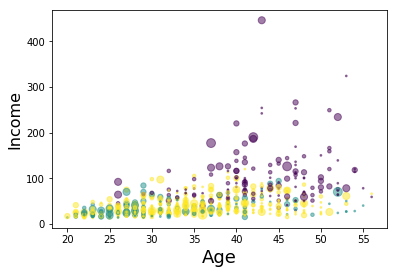

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


area = np.pi * ( X[:, 1])**2  
labels = k_means.labels_
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


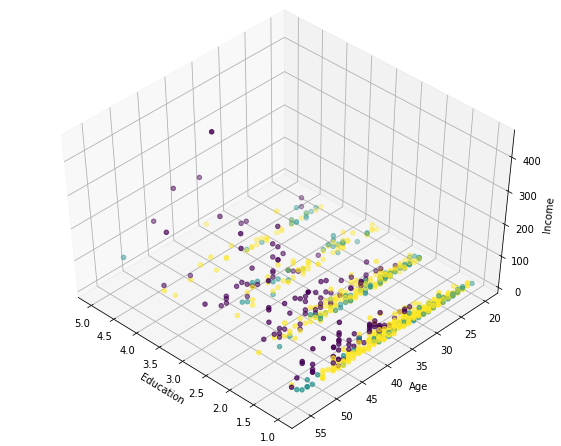

In [11]:

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
